In [2]:
import matplotlib.pyplot as plt #melakukan import library matplotlib.pyplot sebagai plt
import pandas as pd #melakukan import library pandas sebagai pd
import numpy as np #melakukan import library numpy sebagai np
import cv2 as cv #melakukan import library cv2 sebagai cv
from math import floor #import fungsi floor pada library math

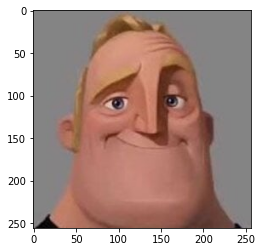

In [3]:
img = plt.imread("allgood.jpg") #mengimport file allgood.jpg kedalam variabel img menggunakan imread pada library plt
plt.imshow(img) #menampilkan citra yang telah di import ke dalam variabel img menggunakan imshow pada library plt

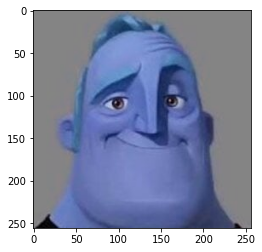

In [4]:
img2 = plt.imread("green_2.jpg")
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
hsv = cv.cvtColor(img2, cv.COLOR_RGB2HSV)
plt.imshow(rgb)

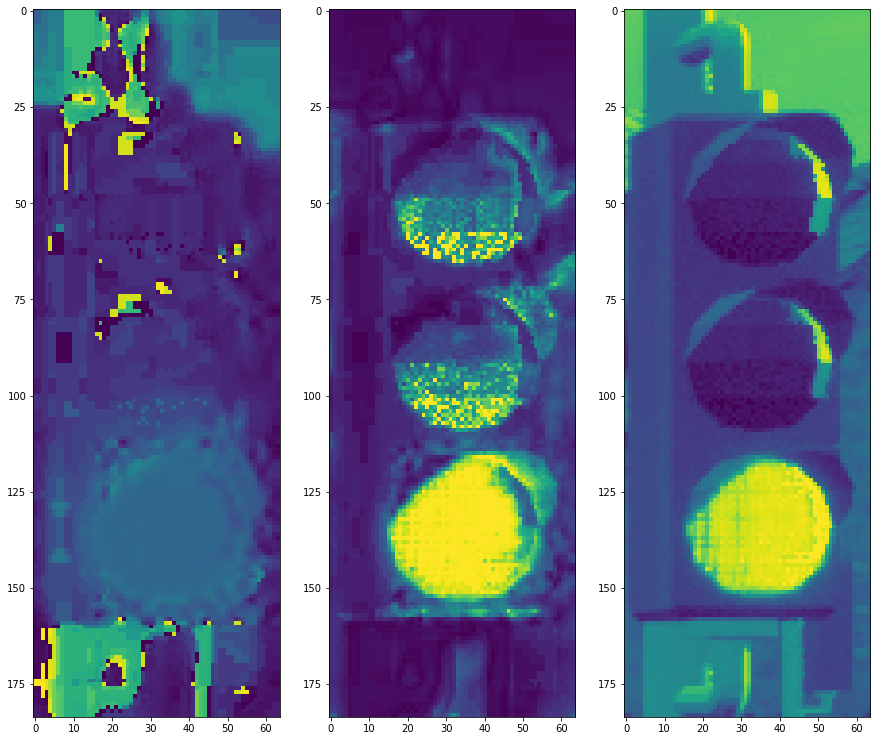

In [5]:
import matplotlib.pyplot as plt
import skimage as io

from copy import deepcopy

red = deepcopy(rgb)
green = deepcopy(rgb)
blue = deepcopy(rgb)

#red[:,:,1] = 0
#red[:,:,2] = 0

#green[:,:,0] = 0
#green[:,:,2] = 0

#blue[:,:,0] = 0
#blue[:,:,1] = 0


'''red[:,:,1]=0
red[:,:,1]=0
green[:,:,2]=0
green[:,:,2]=0
blue[:,:,3]=0
blue[:,:,3]=0'''

h,s,v = cv.split(hsv)
hsv_split = np.concatenate((h,s,v),axis=1)
#plt.imshow(h)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(h)
plt.subplot(1,3,2)
plt.imshow(s)
plt.subplot(1,3,3)
plt.imshow(v)

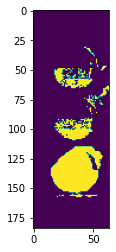

In [6]:
def convert(citra):
    #melakukan thresholding pada citra untuk memisahkan antar objek pada citra dan backgroundnya
    ret, thresh = cv.threshold(citra,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    thresh = 255-thresh
    #citra yang telah di convert dan threshold akan dikembalikan ke fungsi
    return thresh

plt.imshow(convert(s))

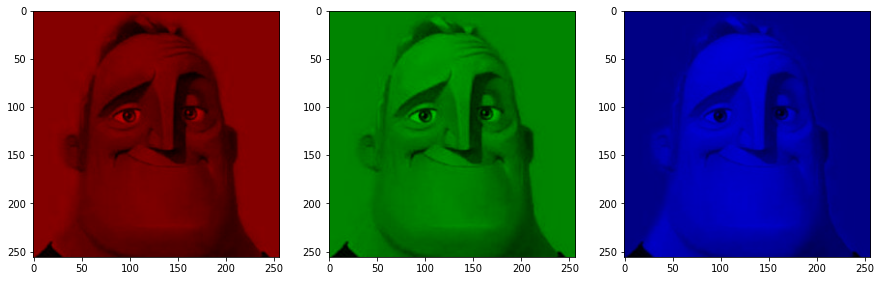

In [7]:
red[:,:,1] = 0
red[:,:,2] = 0

green[:,:,0] = 0
green[:,:,2] = 0

blue[:,:,0] = 0
blue[:,:,1] = 0

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(red)
plt.subplot(1,3,2)
plt.imshow(green)
plt.subplot(1,3,3)
plt.imshow(blue)

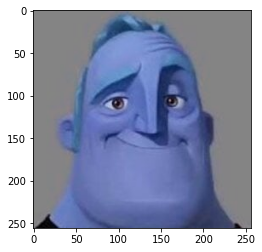

In [8]:
red[:,:,1] = 0
red[:,:,2] = 0

green[:,:,0] = 0
green[:,:,2] = 0

blue[:,:,0] = 0
blue[:,:,1] = 0


rgb2 = cv.cvtColor(hsv, cv.COLOR_HSV2RGB)

plt.imshow(rgb)

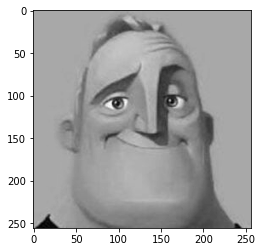

In [9]:
grayimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #mengonversi warna dari BGR(dalam format cv2) ke GRAY
plt.imshow(grayimg, cmap='gray') #menampilkan hasil citra yang telah di konversi 
tinggi, lebar = grayimg.shape #mengambil nilai tinggi dan lebar citra dengan shape dan menampungnya di variabel tinggi dan lebar

1. Translasi

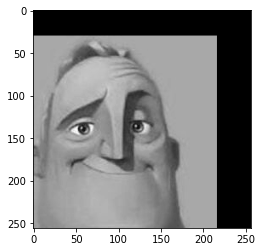

In [10]:
Tx = -40 #variabel Tx dan Ty akan menyimpan nilai -40 dan 30 sebagai nilai pergeseran pada sumbu x dan y 
Ty = 30
trans = np.zeros([len(grayimg), len(grayimg[0])]) #membuat matrix nol dengan ukuran dari citra grayimg
for x in range (len(grayimg)): #perulangan x sebanyak ukuran tinggi dari citra
    for y in range (len(grayimg[0])): #perulanga y di dalam perulangan x sebanyak ukuran lebar dari citra
        new_x = x - Tx #melakukan operasi dilatasi dengan mengurangkan nilai x dengan variabel Tx
        new_y = y - Ty #melakukan operasi dilatasi dengan mengurangkan nilai y dengan variabel Ty
        if (new_x >= len(grayimg) or new_y >= len(grayimg[0]) or new_x < 0 or new_y < 0): #melakukan clipping dengan syarat kalau nilai citra lebih dari ukuran citra atau kurang dari 0 maka nilainya di set ke 0
            trans[y][x] = 0
        else: #jika tidak maka nilai citra grayimg berdasarkan indeks baru yaitu new_x dan new_y akan di masukkan ke varibel matriks kosong trans sebagai hasil dari translasi terhadap citra grayimg
            trans[y][x] = grayimg[new_y][new_x]
plt.imshow(trans, cmap='gray') #menampilkan hasil citra setelah dilakukan operasi translasi 

2. Rotasi

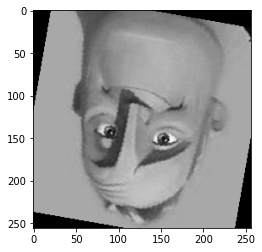

In [11]:
from math import sin, cos #mengimport fungsi sin dan cos pada library math, sin dan cos akan berfungsi untuk menghitung nilai sin dan cos dari suatu sudut
rot = np.zeros([len(grayimg),len(grayimg[0])]) #membuat matriks 0 dengan ukuran sama seperti citra grayimg
vertikal, horizontal = grayimg.shape #mengambil ukuran dari citra dengan fungsi shape dan memasukkannya kedalam variabel vertikal dan horizontal
mid_x = horizontal//2 #membagi dua nilai dari variabel horizontal dan memasukkannya ke variabel mid_x (ini nantinya menjadi nilai dengan dari x)
mid_y = vertikal//2 #membagi dua nilai dari variabel vertikal dan memasukkannya ke variabel mid_y (menjadi nilai tengah dari y)
sudut = 170 #variabel sudut akan menampung nilai 170
theta = sudut * 22/7 /180
for x in range (horizontal): #melakukan perulangan x sebanyak nilai dari horizontal (menghasilkan nilai 0-255)
    for y in range (vertikal):  #melakukan perulangan y di dalam perulangan x sebanyak nilai dari vertikal  (menghasilkan nilai 0-255)
        a = int((cos(theta)*(x-mid_x)+sin(theta)*(y-mid_y)+mid_x)) #menggunakan rumus rotasi untuk merotasi citra sebesar 170 derajat
        b = int((-sin(theta)*(x-mid_x)+cos(theta)*(y-mid_y)+mid_y)) #menggunakan rumus yang berlawanan arah jarum jam dengan sin menjadi minus
        if (a >= horizontal or b >= vertikal or a < 0 or b < 0): #melakukan clipping dengan syarat kalau nilai citra lebih dari ukuran citra atau kurang dari 0 maka nilainya di set ke 0
            rot[x][y] = 0
        else: #jika tidak maka nilai citra langsung masuk ke variabel rot
            rot[x][y] = grayimg[a][b]
plt.imshow(rot, cmap="gray") #mencetak hasil dari operasi rotasi

3. Pencerminan

a. Terhadap sumbu x

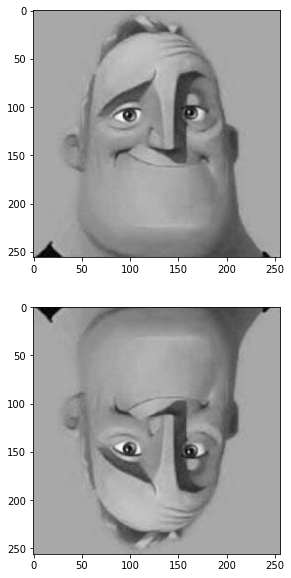

In [12]:
mirror = np.zeros([len(grayimg), len(grayimg[0])]) #membuat matriks 0 dengan identitas mirror dgn ukuran dari citra grayimg 
for x in range (len(grayimg)): #melakukan perulangan x sebanyak ukuran dari citra grayimg (256)
    for y in range (len(grayimg)): #melakukan perluangan y didalam perulangan x dengan ukuran yang sama 
        mirror[x][y] = grayimg[-x][y] #memasukkan nilai cari citra grayimg ke matrix nol mirror dengan indeks dari x pada matriks citra grayimg di-minus kan agar terjadinya pencerminan terhadap sumbu x
plt.figure(figsize = (10,10)) #fungsi figure untuk mengatur ukuran tampilan dari citra yang ditampilkan dengan fungsi imshow pada library plt
plt.subplot(2,1,1) #fungsi subplot untuk mengatur layout dari citra yang akan ditampilkan dengan mengambil 3 argumen padad fungsi ini
plt.imshow(grayimg,cmap="gray") #menampilkan hasil citra sebelum dilakukan pencerminan
plt.subplot(2,1,2) 
plt.imshow(mirror, cmap='gray') #menampilkan hasil citra setelah dilakukan pencerminan

b. Terhadap sumbu y

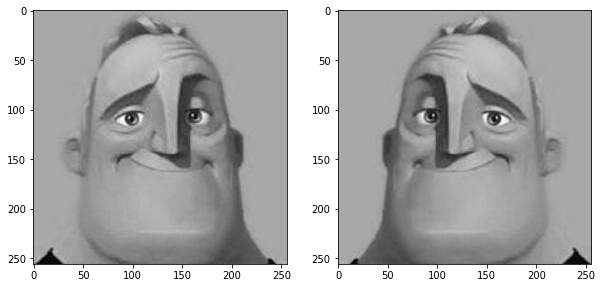

In [13]:
mirror = np.zeros([len(grayimg), len(grayimg[0])]) #membuat matriks 0 dengan identitas mirror dgn ukuran dari citra grayimg 
for x in range (len(grayimg)): #melakukan perulangan x sebanyak ukuran dari citra grayimg (256)
    for y in range (len(grayimg)): #melakukan perluangan y didalam perulangan x dengan ukuran yang sama 
        mirror[x][y] = grayimg[x][-y] #memasukkan nilai cari citra grayimg ke matrix nol mirror dengan indeks dari y pada matriks citra grayimg di-minus kan agar terjadinya pencerminan terhadap sumbu y
plt.figure(figsize = (10,10))#fungsi figure untuk mengatur ukuran tampilan dari citra yang ditampilkan dengan fungsi imshow pada library plt
plt.subplot(1,2,1) #fungsi subplot untuk mengatur layout dari citra yang akan ditampilkan dengan mengambil 3 argumen pada fungsi ini
plt.imshow(grayimg,cmap="gray") #menampilkan hasil citra sebelum dilakukan pencerminan
plt.subplot(1,2,2) 
plt.imshow(mirror,cmap="gray")  #menampilkan hasil citra setelah dilakukan pencerminan

4. Dilatasi

size sebelum:  65536
size sesudah:  262144


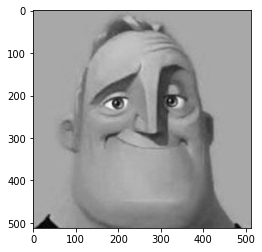

In [14]:
skalar = 2 #variabel skalar menyimpan nilai 2 sebagai nilai yang akan dioperasikan dalam operasi dilatasi
horz, ver = grayimg.shape #mengambil nilai ukuran pada citra grayimg dan memasukkan ke dalam variabel horz dan val
new_horz = floor(horz *skalar) #nilai pada horz akan dikalikan dengan skalar dan hasilnya akan dibuatkan kebawah dan di simpan pada variabel new_horz
new_ver = floor(ver*skalar) #nilai pada ver akan dikalikan dengan skalar dam hasilnya akan dibulatkan kebawah dan disimpan pada variabel new_ver
dilatation = np.zeros([new_horz, new_ver]) #membuat matrikx nol dengan ukuran baru dari citra yang telah dikalikan dengan skalar dan matriks itu akan di simpan pada variabel dilatation
for x in range (new_horz): #melakukan perulangan x sebanyak new_horz
    for y in range (new_ver): #melakuakn perulangan y dalam perulangan new_horz sebanyak new_ver
        oldX = int(horizontal * x / new_horz) #ukuran tinggi dari citra akan di kalikan dengan x dan dibagi dengan new_horz dan hasilnya di simpan pada variabel oldX
        oldY = int(vertikal * y / new_ver) #ukuran lebar dari citra akan dikalikan dengan y dan dibagi dengan dengan new_ver dan hasilnya akan disimpan pada variabel oldY
        dilatation [x, y] = grayimg [oldX, oldY] #hasil dari setiap operasi di atas akan menjadi nilai dari index baru pada dilatation dan menjadi citra baru yang telah didilatasi

plt.imshow(dilatation, cmap='gray') #mencetak citra baru hasil operasi dilatasi
print("size sebelum: ",grayimg.size) #menampilkan ukuran citra sebelum di dilatasi
print("size sesudah: ",dilatation.size) #menampilkan ukuran citra setelah di dilatasi


5. Histogram Grayscale 

In [15]:
sumGray = np.zeros(256).astype(int) #menggunakan zeros untuk membuat array 1 dimensi yang berisi 0 sebanyak 256
#melakukan perulangan untuk menghitung jumlah pixel yang memiliki derajat keabuan i
for  i in range(tinggi): 
    for j in range(lebar): 
        val = grayimg[i,j] 
        sumGray[val] += 1 
print ("ni:\n", sumGray) #mencetak jumlah pixel yang memiliki derajat keabuan i
print("n:", sumGray.sum())

ni:
 [    4     5     8    11    10    15    10     8    17    14    14    13
    16     8     6     4     7     7     7     2     1     4     5     6
     5     6     4    11     9     4    11     7    13    10    10    22
    14    39    27    38    37    53    58    62    76    70    82   101
    92    92   109   111    86   102   112   119   123   130   152   141
   134   128   192   150   196   221   240   219   235   210   196   195
   164   194   183   159   142   158   138   131   142   149   182   156
   174   161   178   207   202   222   223   260   252   350   409   424
   473   482   494   489   442   382   395   386   417   361   401   393
   407   413   448   501   589   623   674   659   662   633   599   570
   517   540   646   630   622   739   797   962  1074  1174  1463  2178
 22496  1755   826   687   643   586   671   594   507   515   384   390
   340   291   286   294   221   190   193   208   200   153    76    27
    13    12     7     8     9    10     5    

Histogram Citra Negatif

<function matplotlib.pyplot.show(close=None, block=None)>

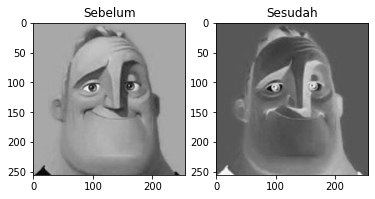

In [16]:
imgNegatif = np.zeros(grayimg.shape).astype(int) #membuat matrix nol dengan ukuran citra grayimg
fig = plt.figure(facecolor ='white') #membuat figure (kanvas bagi gambar) dan set facecolor ke white
for i in range(len(grayimg)): #perulangan i sebanyak ukuran dari citra
    for j in range (len(grayimg[0])): #perulangan j dalam perulangan i sebanyak ukuran citra
        imgNegatif[i,j] = 255 - grayimg[i,j] #melakukan operasi citra negatif dengan setiap elemen matriks citra menjadi pengurang terhadap 255
fig.add_subplot(121) #fungsi subplot untuk mengatur layout dari citra yang akan ditampilkan dengan mengambil 3 argumen padad fungsi ini
plt.imshow(grayimg,cmap='gray') #menampilkan citra sebelum dilakukan operasi citra negatif
plt.title("Sebelum") #memeberikan title pada citra dengan fungsi title pada plt
fig.add_subplot(122)
plt.imshow(imgNegatif,cmap='gray')#menampilkan citra setelah dilakukan operasi citra negatif
plt.title("Sesudah")
plt.show #menampilkan keseluruhan citra

In [17]:
sumNeg = np.zeros(256).astype(int) #menggunakan zeros untuk membuat array 1 dimensi yang berisi 0 sebanyak 256
#melakukan perulangan untuk menghitung jumlah pixel yang memiliki derajat keabuan i
for  i in range(tinggi): 
    for j in range(lebar): 
        val = imgNegatif[i,j] 
        sumNeg[val] += 1 
print ("ni:\n", sumNeg) #mencetak jumlah pixel yang memiliki derajat keabuan i
print("n:", sumNeg.sum()) #mencetak jumlah seluruh pixel pada citra

ni:
 [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     1     2     1     1     2     4
     3     1     2     1     2     4     2     5     2     1     5     5
     2     1     0     3     0     2     3     1     4     5     1     3
     2     3     2     1     5     1     3     1     1     5    10     9
     8     7    12    13    27    76   153   200   208   193   190   221
   294   286   291   340   390   384   515   507   594   671   586   643
   687   826  1755 22496  2178  1463  1174  1074   962   797   739   622
   630   646   540   517   570   599   633   662   659   674   623   589
   501   448   413   407   393   401   361   417   386   395   382   442
   489   494   482   473   424   409   350   2

<BarContainer object of 256 artists>

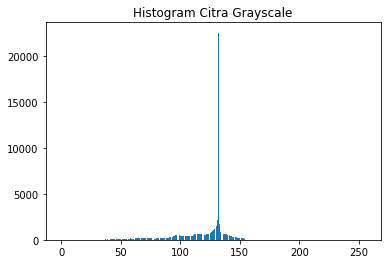

In [18]:
grayValue = [i for i in range(256)] #melakukan perulangan untuk membuat array yang berisi angka 0 sampai 255 dan menyimpannya di variabel grayValue
plt.title("Histogram Citra Grayscale") #membuat judul dari histogram dengan fungsi title
plt.bar(grayValue, sumGray) #menampilkan histogram dari citra sebelum dilakukan operasi citra negatif

<BarContainer object of 256 artists>

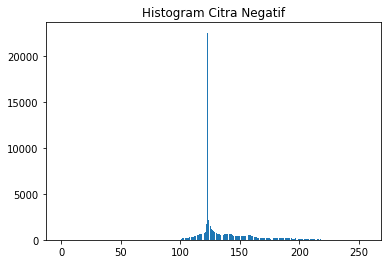

In [19]:
plt.title("Histogram Citra Negatif") 
plt.bar(grayValue, sumNeg) #menampilkan histogram citra setelah dilakukan operasi citra negatif

<function matplotlib.pyplot.show(close=None, block=None)>

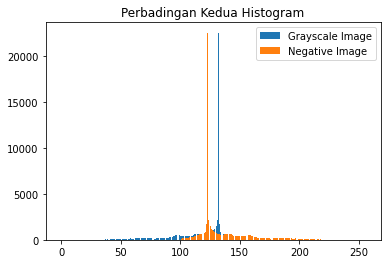

In [20]:
label = ['Grayscale Image', 'Negative Image'] #membuat variabel yang akan menjadi keterangan dari histogram
plt.title("Histogram Grayscale") 
plt.bar(grayValue, sumGray)
plt.title("Perbadingan Kedua Histogram") 
plt.bar(grayValue, sumNeg) 
plt.legend(label, loc = "upper right") #membuat legend pada histogram fungsi legend pada plt
plt.show #menampilkan perbandingan kedua histogram citra sebelum dan sesudah dilakukan operasi citra negatif